In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
RedWinesData=pd.read_csv('C:/Users/USER/AppData/Roaming/Microsoft/Windows/Start Menu/Programs/Anaconda3 (64-bit)/New folder/winequality-red.csv',encoding='latin1')

In [4]:
RedWinesData.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:
RedWinesData.info()
# there is no missing values
# all are numerical values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


array([[<AxesSubplot:title={'center':'quality'}>]], dtype=object)

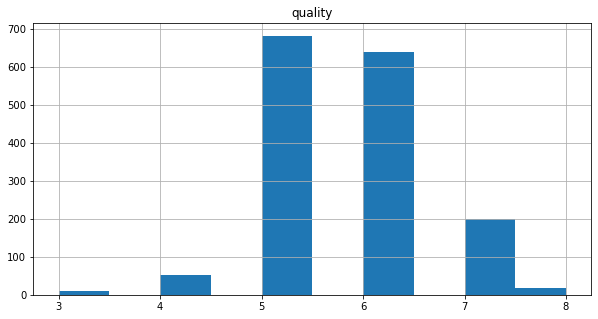

In [6]:
# quality has to be predicted
# visual diagram for quality

RedWinesData.hist('quality',figsize=(10,5))

In [7]:
# predictors are all numericals 
TargetVariable='quality'
print(RedWinesData.columns)
Predictors=['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol']

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')


array([[<AxesSubplot:title={'center':'fixed acidity'}>,
        <AxesSubplot:title={'center':'volatile acidity'}>,
        <AxesSubplot:title={'center':'citric acid'}>],
       [<AxesSubplot:title={'center':'residual sugar'}>,
        <AxesSubplot:title={'center':'chlorides'}>,
        <AxesSubplot:title={'center':'free sulfur dioxide'}>],
       [<AxesSubplot:title={'center':'total sulfur dioxide'}>,
        <AxesSubplot:title={'center':'density'}>,
        <AxesSubplot:title={'center':'pH'}>],
       [<AxesSubplot:title={'center':'sulphates'}>,
        <AxesSubplot:title={'center':'alcohol'}>, <AxesSubplot:>]],
      dtype=object)

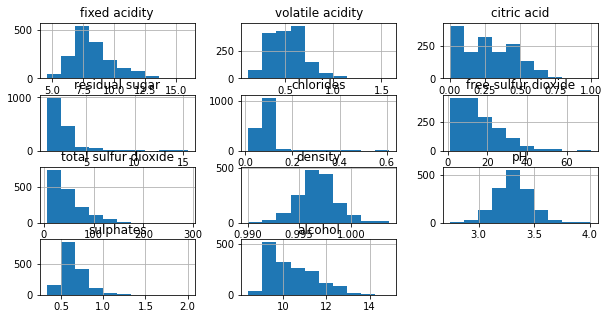

In [8]:
# visual diagrams of predictors
RedWinesData.hist(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],figsize=(10,5))

In [9]:
# correlation test 

RedWinesData.corr()
 
# ph is higly correlated and also free sulfur dioxide    also correlated with quality

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


In [10]:
RedWinesData.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


<AxesSubplot:xlabel='chlorides', ylabel='quality'>

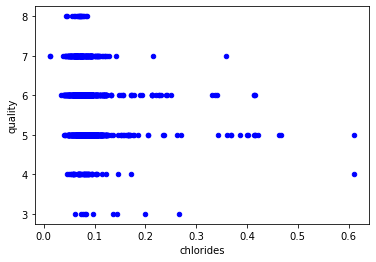

In [11]:
RedWinesData.plot.scatter(x='chlorides',y='quality',marker='o',color='blue')

<AxesSubplot:xlabel='free sulfur dioxide', ylabel='quality'>

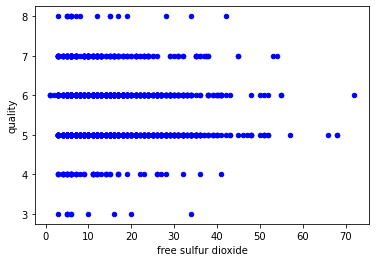

In [12]:
RedWinesData.plot.scatter(x='free sulfur dioxide',y='quality',marker='o',color='blue')

<AxesSubplot:xlabel='fixed acidity', ylabel='quality'>

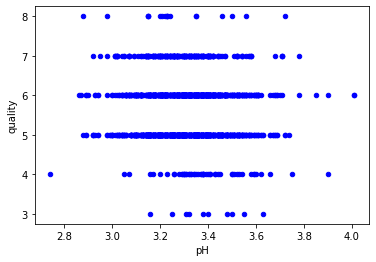

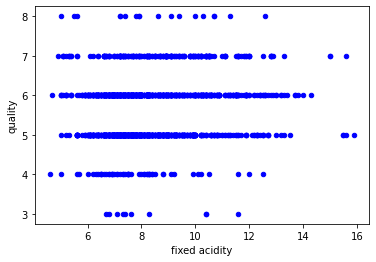

In [13]:
# visual diagram of other predictors with TargetVariable
RedWinesData.plot.scatter(x='pH',y='quality',marker='o',color='blue')
RedWinesData.plot.scatter(x='fixed acidity',y='quality',marker='o',color='blue')



<AxesSubplot:xlabel='volatile acidity', ylabel='quality'>

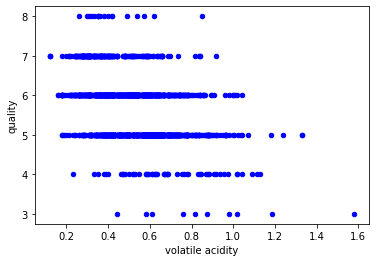

In [14]:
RedWinesData.plot.scatter(x='volatile acidity',y='quality',marker='o',color='blue')


<AxesSubplot:xlabel='citric acid', ylabel='quality'>

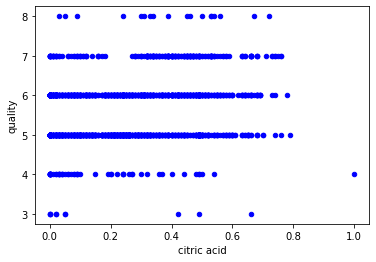

In [15]:
RedWinesData.plot.scatter(x='citric acid',y='quality',marker='o',color='blue')

<AxesSubplot:xlabel='residual sugar', ylabel='quality'>

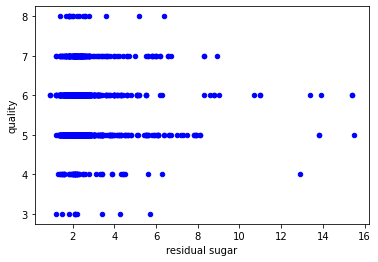

In [16]:
RedWinesData.plot.scatter(x='residual sugar',y='quality',marker='o',color='blue')

<AxesSubplot:xlabel='total sulfur dioxide', ylabel='quality'>

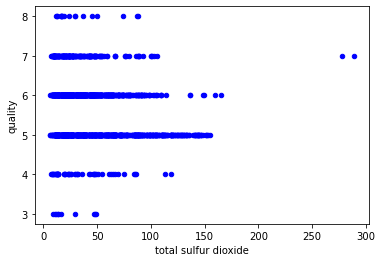

In [17]:
RedWinesData.plot.scatter(x='total sulfur dioxide',y='quality',marker='o',color='blue')

<AxesSubplot:xlabel='density', ylabel='quality'>

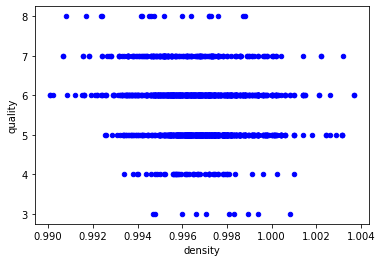

In [18]:
RedWinesData.plot.scatter(x='density',y='quality',marker='o',color='blue')

<AxesSubplot:xlabel='sulphates', ylabel='quality'>

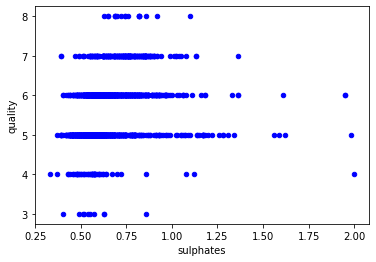

In [19]:
RedWinesData.plot.scatter(x='sulphates',y='quality',marker='o',color='blue')

<AxesSubplot:xlabel='alcohol', ylabel='quality'>

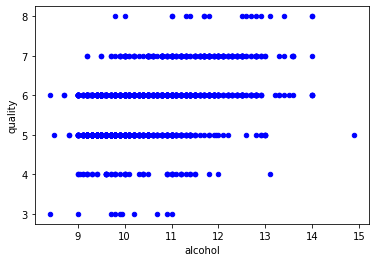

In [20]:
RedWinesData.plot.scatter(x='alcohol',y='quality',marker='o',color='blue')